In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder

In [23]:
df = pd.read_csv('./data/train_augumented.csv', index_col='date', parse_dates=True, dtype={'sales': 'float32'})
df.head()

,id,store_nbr,family,sales,onpromotion,oil_price,is_holiday
date,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,NaN,0
2013-01-01,1,1,BABY CARE,0.0,0,93.14,0
2013-01-01,2,1,BEAUTY,0.0,0,92.97,0
2013-01-01,3,1,BEVERAGES,0.0,0,93.12,0
2013-01-01,4,1,BOOKS,0.0,0,93.20,0


In [24]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

In [25]:
sorted_df = df.sort_values(by=['date', 'store_nbr', 'family'])

sorted_df

,id,store_nbr,family,sales,onpromotion,oil_price,is_holiday
date,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000000,0,93.14,0
2013-01-01,1,1,BABY CARE,0.000000,0,93.14,0
2013-01-01,2,1,BEAUTY,0.000000,0,92.97,0
2013-01-01,3,1,BEVERAGES,0.000000,0,93.12,0
2013-01-01,4,1,BOOKS,0.000000,0,93.20,0
...,...,...,...,...,...,...,...
2017-08-15,3000751,54,POULTRY,59.618999,0,47.26,0
2017-08-15,3000752,54,PREPARED FOODS,94.000000,0,47.26,0
2017-08-15,3000753,54,PRODUCE,915.370972,76,47.26,0


In [26]:
#validate that there is the same number of records for each date
numbers_of_records_per_date = set(sorted_df.groupby('date').size().values)
numbers_of_records_per_date

{1782}

In [27]:
number_of_records_per_date = numbers_of_records_per_date.pop()

In [59]:
for i in range(1,8):
    sorted_df[f'sales-{i}'] = sorted_df.sales.shift(i*number_of_records_per_date)

In [29]:
sorted_df

,id,store_nbr,family,sales,onpromotion,oil_price,is_holiday,sales-1,sales-2,sales-3,sales-4
date,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000000,0,93.14,0,NaN,NaN,NaN,NaN
2013-01-01,1,1,BABY CARE,0.000000,0,93.14,0,NaN,NaN,NaN,NaN
2013-01-01,2,1,BEAUTY,0.000000,0,92.97,0,NaN,NaN,NaN,NaN
2013-01-01,3,1,BEVERAGES,0.000000,0,93.12,0,NaN,NaN,NaN,NaN
2013-01-01,4,1,BOOKS,0.000000,0,93.20,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,3000751,54,POULTRY,59.618999,0,47.26,0,56.154999,79.062996,91.670998,80.759003
2017-08-15,3000752,54,PREPARED FOODS,94.000000,0,47.26,0,147.000000,91.000000,81.000000,54.000000
2017-08-15,3000753,54,PRODUCE,915.370972,76,47.26,0,585.614990,877.304016,696.919983,546.250000


In [60]:
final_df = sorted_df.dropna()

final_df

,id,store_nbr,family,sales,onpromotion,oil_price,is_holiday,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7
date,,,,,,,,,,,,,,
2013-01-08,12474,1,AUTOMOTIVE,2.000000,0,47.26,0,0.000000,2.000000,5.000000,3.000000,3.000000,2.000000,0.000000
2013-01-08,12475,1,BABY CARE,0.000000,0,47.26,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013-01-08,12476,1,BEAUTY,3.000000,0,47.26,0,1.000000,0.000000,3.000000,3.000000,0.000000,2.000000,0.000000
2013-01-08,12477,1,BEVERAGES,1029.000000,0,47.26,0,1158.000000,407.000000,1160.000000,953.000000,919.000000,1091.000000,0.000000
2013-01-08,12478,1,BOOKS,0.000000,0,47.26,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,3000751,54,POULTRY,59.618999,0,47.26,0,56.154999,79.062996,91.670998,80.759003,49.666000,51.014999,73.289001
2017-08-15,3000752,54,PREPARED FOODS,94.000000,0,47.26,0,147.000000,91.000000,81.000000,54.000000,61.000000,91.000000,86.000000
2017-08-15,3000753,54,PRODUCE,915.370972,76,47.26,0,585.614990,877.304016,696.919983,546.250000,498.122009,595.184998,790.013000


In [61]:
test_size = 16*number_of_records_per_date

train = final_df.head(-test_size)
test = final_df.tail(test_size)

train

,id,store_nbr,family,sales,onpromotion,oil_price,is_holiday,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7
date,,,,,,,,,,,,,,
2013-01-08,12474,1,AUTOMOTIVE,2.000000,0,47.26,0,0.000000,2.000000,5.000000,3.000000,3.000000,2.000000,0.000000
2013-01-08,12475,1,BABY CARE,0.000000,0,47.26,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013-01-08,12476,1,BEAUTY,3.000000,0,47.26,0,1.000000,0.000000,3.000000,3.000000,0.000000,2.000000,0.000000
2013-01-08,12477,1,BEVERAGES,1029.000000,0,47.26,0,1158.000000,407.000000,1160.000000,953.000000,919.000000,1091.000000,0.000000
2013-01-08,12478,1,BOOKS,0.000000,0,47.26,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-30,2972239,54,POULTRY,72.895996,0,47.26,0,82.295998,46.655998,52.085999,34.855999,50.686001,51.209000,94.931000
2017-07-30,2972240,54,PREPARED FOODS,124.000000,1,47.26,0,81.000000,68.000000,73.000000,81.000000,65.000000,112.000000,159.000000
2017-07-30,2972241,54,PRODUCE,793.146973,5,47.26,0,729.843994,562.096985,520.489014,559.658020,914.958984,654.929993,788.414978


In [62]:
encoder = OrdinalEncoder()
x_train = encoder.fit_transform(train.drop('id', axis=1).drop('sales', axis=1).values)
y_train = train.sales.values

x_test = encoder.fit_transform(test.drop('id', axis=1).drop('sales', axis=1).values)
y_test = test.sales.values

In [65]:
regressor = RandomForestRegressor(n_estimators=100, n_jobs=-1)

regressor.fit(x_train, y_train)

regressor.score(x_train, y_train), regressor.score(x_test, y_test)

(0.9912148691698219, 0.006214467403803936)

<BarContainer object of 12 artists>

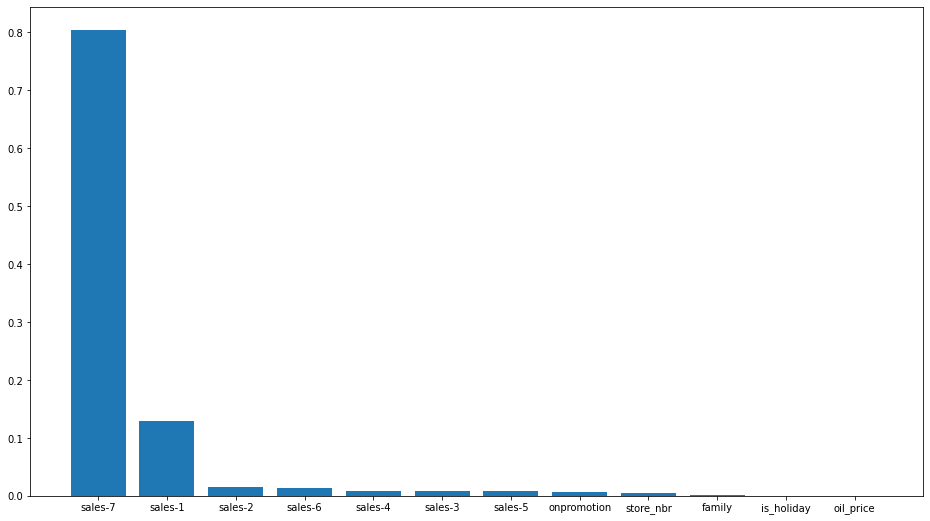

In [66]:
feature_importance = regressor.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
features = np.array([name for name in train.columns.tolist() if name != 'sales' and name != 'id'])

plt.figure(figsize=(16,9))
plt.bar(features[sorted_indices], feature_importance[sorted_indices])
